In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [5]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
y_train.shape

(60000,)

In [7]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc = OneHotEncoder()

In [10]:
enc.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [11]:
y_train_enc = np.array(enc.transform(y_train).toarray(), dtype='float32')
y_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_test_enc = np.array(enc.transform(y_test).toarray(), dtype='float32')
y_test_enc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1), activation='relu', padding='SAME'))
#필터개수 32
#필터사이즈 3*3 (3줄3칸)
#입력이미지 사이즈 28*28,1 (28줄28칸, 흑백)
#활성함수 relu (actvation = 'relu')
#stride = 1
#padding ='SAME'

In [0]:
model.add(Conv2D(64,kernel_size=(3,3), strides=1, activation='relu', padding='SAME'))

In [16]:
model.add(MaxPooling2D(pool_size=2,strides=1,padding="SAME"))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512,activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
__________________________________________

In [21]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001), metrics=['acc'])

In [22]:
model.fit(X_train/255, y_train_enc, epochs= 5, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 13s 220us/step - loss: 0.1065 - acc: 0.9669
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0301 - acc: 0.9906
Epoch 3/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.0162 - acc: 0.9946
Epoch 4/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0099 - acc: 0.9966
Epoch 5/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0091 - acc: 0.9969


In [23]:
predict = model.predict(X_test)
predict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
predict01 = np.argmax(predict,1)
predict01

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
target = np.argmax(y_test_enc,1)
target

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
acc = np.average(predict01==target)

In [27]:
acc

0.989

In [0]:
import matplotlib.pyplot as plt

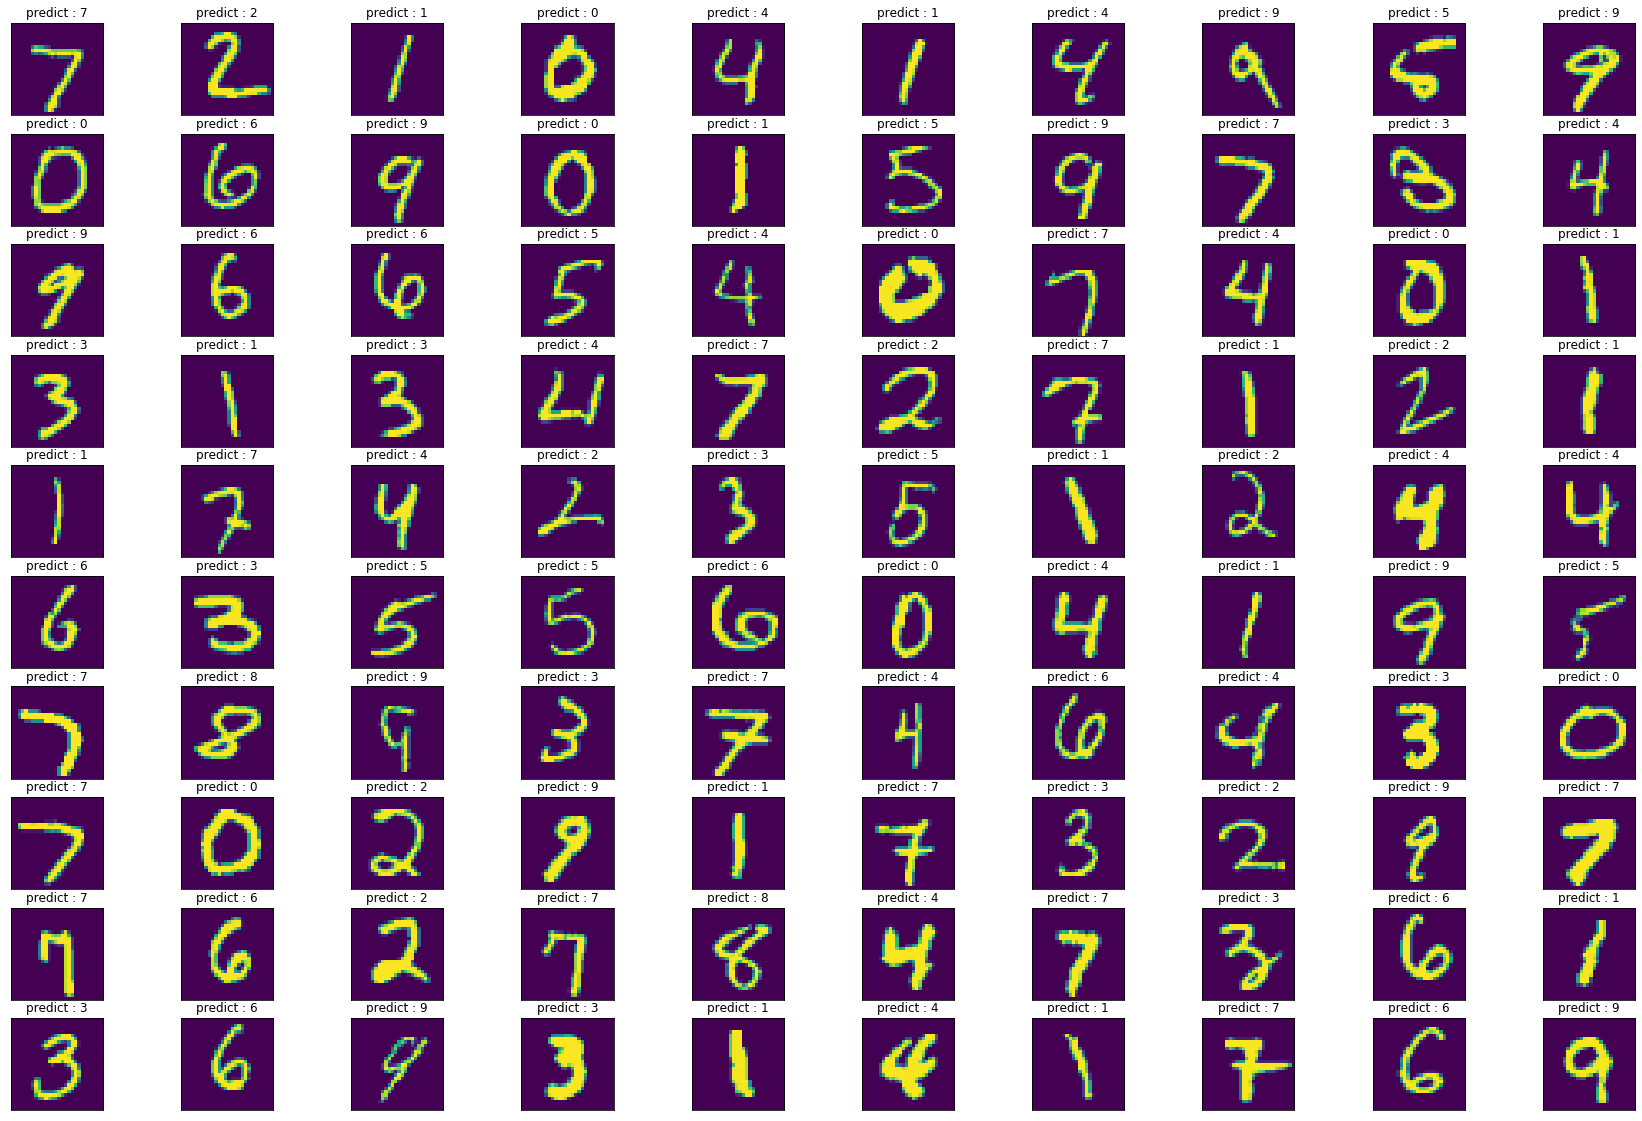

In [32]:
fig = plt.figure(figsize = (30,20))
for i in range(100):
  subplot = fig.add_subplot(10,10,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('predict : %d'% predict01[i])
  subplot.imshow(X_test[i].reshape((28,28)))
plt.show()